In [4]:
import os
import matplotlib.pyplot as plt
from skimage.io import imread
from cellpose import models,core
import numpy as np
import nd2
#import squidpy as sq
from skimage import exposure

In [5]:
my_nd2 = nd2.imread('/Users/egokerku/Desktop/spinning/20241121_135240_833/WellA4_Channel405 CSU,561 CSU_Seq0000.nd2')                          

In [6]:
image = my_nd2[0,0,:,:]

In [7]:
p2, p98 = np.percentile(image, (2, 98))
img_rescale = exposure.rescale_intensity(image, in_range=(p2, p98))

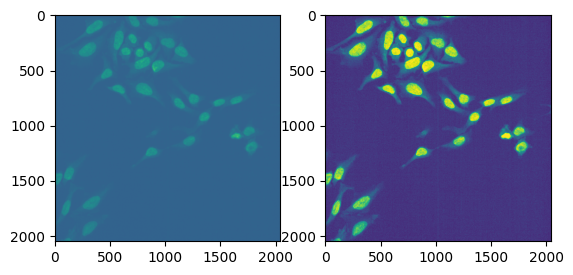

In [8]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(image)
axarr[1].imshow(img_rescale)

## Cytoplasm

In [25]:
model = models.Cellpose(gpu=True, model_type="cyto3")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cellpose/dynamics.py:189: RuntimeWarning: invalid value encountered in divide
  mu /= (1e-60 + (mu**2).sum(axis=0)**0.5)


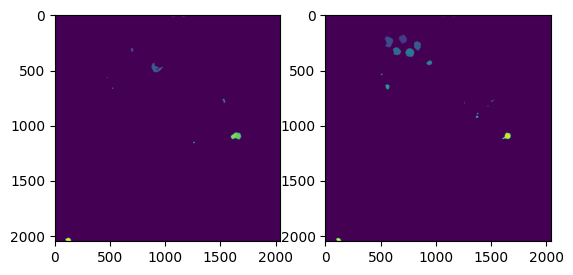

In [10]:
mask, _, _, _ = model.eval(image)
mask_rescale, _, _, _ = model.eval(img_rescale)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(mask)
axarr[1].imshow(mask_rescale)

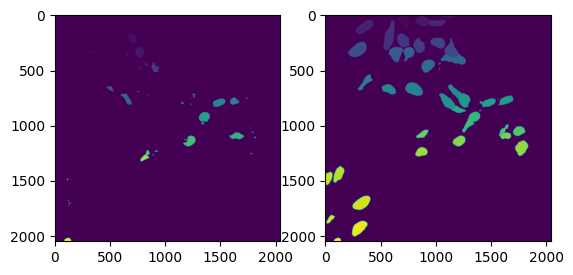

In [12]:
flow_threshold = 0.4
cellprob_threshold=0

mask, _, _, _ = model.eval(image, diameter=None, flow_threshold=flow_threshold,cellprob_threshold=cellprob_threshold)
mask_rescale, _, _, _ = model.eval(img_rescale, diameter=None, flow_threshold=flow_threshold,cellprob_threshold=cellprob_threshold)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(mask)
axarr[1].imshow(mask_rescale)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cellpose/dynamics.py:189: RuntimeWarning: divide by zero encountered in divide
  mu /= (1e-60 + (mu**2).sum(axis=0)**0.5)


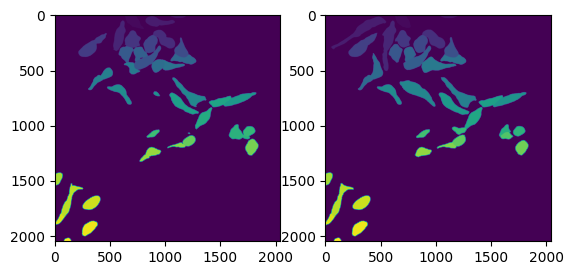

In [26]:
flow_threshold = 0.4
cellprob_threshold=0

mask, _, _, _ = model.eval(image, diameter=100, flow_threshold=flow_threshold,cellprob_threshold=cellprob_threshold)
mask_rescale, _, _, _ = model.eval(img_rescale, diameter=100, flow_threshold=flow_threshold,cellprob_threshold=cellprob_threshold)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(mask)
axarr[1].imshow(mask_rescale)

In [3]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(img_rescale)
axarr[1].imshow(mask_rescale)

NameError: name 'plt' is not defined

In [2]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(image)
axarr[1].imshow(mask0)

NameError: name 'plt' is not defined

## Nuclei

In [13]:
model_nuclei = models.Cellpose(model_type="nuclei")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cellpose/resnet_torch.py:280: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torc

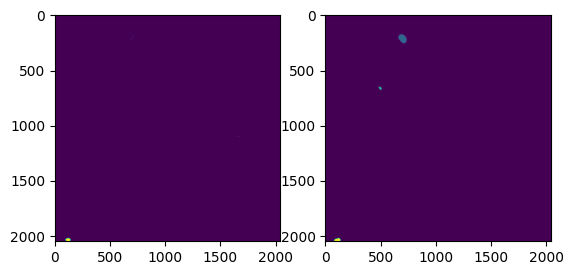

In [14]:
mask, _, _, _ = model_nuclei.eval(image)
mask_rescale, _, _, _ = model_nuclei.eval(img_rescale)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(mask)
axarr[1].imshow(mask_rescale)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


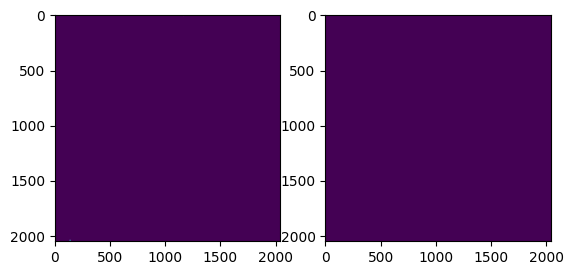

In [15]:
mask, _, _, _ = model_nuclei.eval(image,diameter=None, flow_threshold=flow_threshold,cellprob_threshold=cellprob_threshold)
mask_rescale, _, _, _ = model_nuclei.eval(img_rescale,diameter=None, flow_threshold=flow_threshold,cellprob_threshold=cellprob_threshold)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(mask)
axarr[1].imshow(mask_rescale)

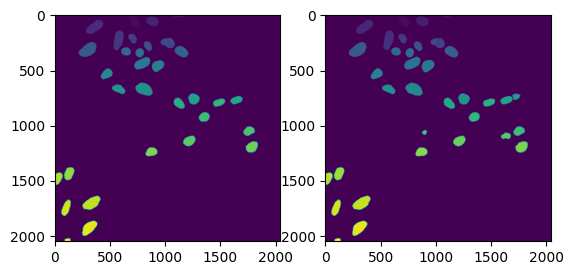

In [33]:
channels = [[0,0]]
mask, _, _, _ = model_nuclei.eval(image,diameter=100, channels=channels)
mask_rescale, _, _, _ = model_nuclei.eval(img_rescale,diameter=100, channels=channels)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(mask)
axarr[1].imshow(mask_rescale)

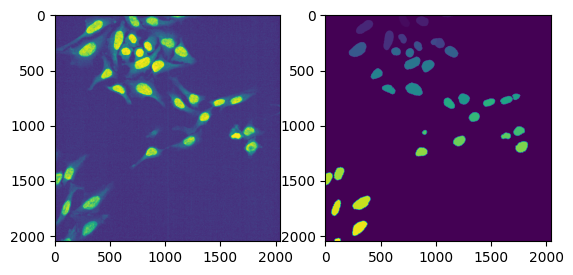

In [34]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(img_rescale)
axarr[1].imshow(mask_rescale)

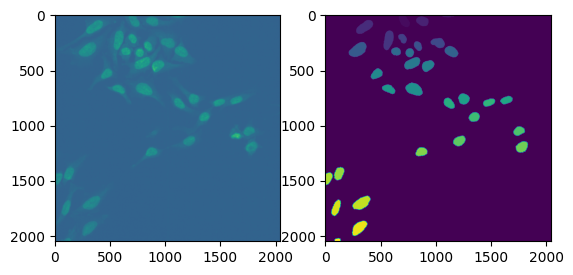

In [35]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(image)
axarr[1].imshow(mask)

In [22]:
mask.max()

32

In [27]:
mask_rescale.max()

37

## CYTO2

In [16]:
model = models.Cellpose(gpu=True, model_type="cyto2")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cellpose/resnet_torch.py:276: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torc

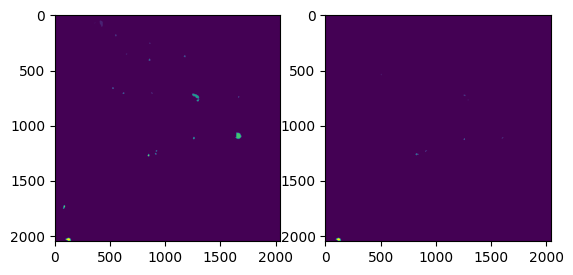

In [17]:
mask, _, _, _ = model.eval(image)
mask_rescale, _, _, _ = model.eval(img_rescale)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(mask)
axarr[1].imshow(mask_rescale)

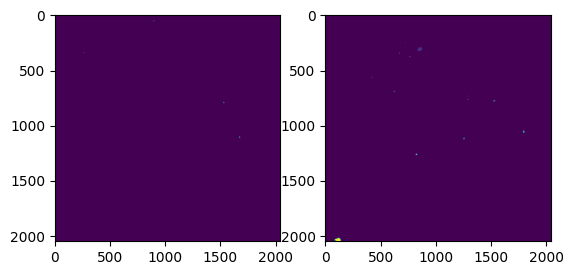

In [18]:
mask, _, _, _ = model.eval(image, diameter=None, flow_threshold=flow_threshold,cellprob_threshold=cellprob_threshold)
mask_rescale, _, _, _ = model.eval(img_rescale, diameter=None, flow_threshold=flow_threshold,cellprob_threshold=cellprob_threshold)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(mask)
axarr[1].imshow(mask_rescale)

## Tissu net

In [23]:
model = models.CellposeModel(model_type='tissuenet_cp3')

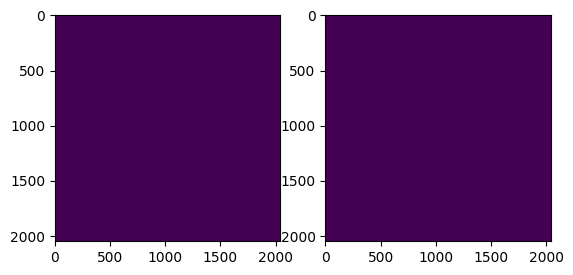

In [24]:
mask,  _, _ = model.eval(image, diameter=100, channels=[0,0])
mask_rescale, _, _ = model.eval(img_rescale, diameter=100, channels=[0,0])

f, axarr = plt.subplots(1,2)
axarr[0].imshow(mask)
axarr[1].imshow(mask_rescale)